# Kinetics Exploration

Enzymes are biological entities (usually proteins) that dramatically accelerate almost all chemical processes occurring within cells. They are necessary for life and perform various critical functions in the body, including digestion and metabolism. Without enzymes, many chemical reactions in the body would not occur rapidly enough to sustain life. Enzymes are giant organic molecules that function as biological catalysts, speeding up reactions. For instance, an enzyme that acts on lipids is lipase. As with other catalysts, enzymes work by lowering the activation energy of a specific reaction without being consumed in the reaction. They do so by adhering to the substrate. Since enzymes are often more significant than their substrates, binding occurs on a single region of the enzyme molecule termed the catalytic site. The reaction begins after the substrate is bonded and the newly produced product is released.

**Enzyme + Substrate --> enzyme-substrate somplex --> Enzyme + Product**

After that, the resultant enzyme is free to attach to another substrate molecule, and the process is repeated. The turnover number of an enzyme refers to the number of substrate molecules that can be bound and reacted every minute. For example, catalase, which converts hydrogen peroxide to water and oxygen gas, has a five million-fold turnover rate. This indicates that each enzyme molecule may degrade five million hydrogen peroxide molecules in a minute.

***

## Research Question

**Is it possible to model the velocity of the reaction of an enzyme at a range of concentrations? What do we expect this to look like?** 

***

#### The deferential equations are: 

- $d[S]/dt = -K_{1}[S][S]+K_{2}[ES]$

- $d[P]/dt = K_{3}[ES]-K_{4}[E][P]$

- $d[E]/dt = -K_{1}[E][S]+K_{2}[E][S]+K_{3}[ES]-K_{4}[E][P]$

- $d[ES]/dt = K_{1}[E][S]-K_{2}[ES-K_{3}[ES]+K_{4}[E][P]$


- $k_{1}$ is the rate of the change of substrate S in the presence of enzyme E to intermediate ES
- $k_{2}$ is the reverse rate of change of intermediate ES back to Substrate
- $k_{3}$ is the rate of change of ES to Product and Enzyme
- $k_{4}$ is the reverse rate of change of Product and Enzyme back to ES

#### Assumptions:

- $k_{4}$ is negligible
- $k_{3}$ is 0.002 $\frac{1}{S}$
- $k_{2}$ is 0.1 $\frac{1}{S}$
- $k_{1}$ is 0.05 $\frac{1}{S}$

***

The following must be imported to effectively model the system: 

In [1]:
import ode
import numpy as np
import matplotlib.pyplot as plt
from vpython import *

<IPython.core.display.Javascript object>

In [2]:
def enzyme_kinetics(dep,t):
    E = dep[0]
    S = dep[1]
    ES = dep[2]
    P = dep[3]
    
    deriv = np.zeros(4)
    deriv[0] = -k1*E*S + k2*ES + k3*ES - k4*E*P #dE/dt
    deriv[1] = -k1*E*S + k2*ES #dS/dt
    deriv[2] = k1*E*S - k2*ES - k3*ES + k4*E*P #dES/dt
    deriv[3] = k3*ES - k4*E*P #dP/dt

    return deriv 


In [10]:
k1 = 0.05 #1/s
k2 = 0.1 #1/s
k3 = 0.02 #1/s
k4 = 0 #1/s

S0 = 1 #mM
P0 = 0 #mM
E0 = 10 #mM
ES0 = 0 #mM
data = np.array([E0,S0,ES0,P0]) #initialize array to store dependent variables

#independent variables
t = 0
h = 0.05
Nsteps = int(500/h) #N steps for T seconds of evolution

#create arrays
tarray = np.zeros(Nsteps)
Sarray = np.zeros(Nsteps)
Earray = np.zeros(Nsteps)
ESarray = np.zeros(Nsteps)
Parray = np.zeros(Nsteps)
dpdtarray = np.zeros(Nsteps)

tarray[0] = t
Sarray[0] = S0
Earray[0] = E0
ESarray[0] = ES0
Parray[0] = P0
dpdtarray[0] = k3*ES0 - k4*E0*P0

#create a time evolution loop
for n in range(1,Nsteps):

    data = ode.RK4(enzyme_kinetics, data, t, h) #update [substrate, product

    t = t + h #update time

    #store values in arrays
    E = data[0]
    S = data[1]
    ES = data[2]
    P = data[3]

    tarray[n] = t #storing time
    Earray[n] = E #store enzyme  
    Sarray[n] = S #store substrate
    ESarray[n] = ES #store complex
    Parray[n] = P #store product
    dpdtarray[n] = k3*ES - k4*E*P


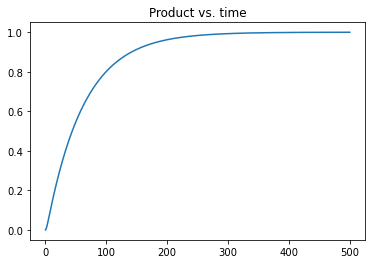

In [11]:
plt.title("Product vs. time")
plt.plot(tarray,Parray)

In [3]:
def go(S0):

#S0 = 1 #mM
    P0 = 0 #mM
    E0 = 10 #mM
    ES0 = 0 #mM
    data = np.array([E0,S0,ES0,P0]) #initialize array to store dependent variables

    #independent variables
    t = 0
    h = 0.05
    Nsteps = int(30/h) #N steps for T seconds of evolution

    #create arrays
    tarray = np.zeros(Nsteps)
    Sarray = np.zeros(Nsteps)
    Earray = np.zeros(Nsteps)
    ESarray = np.zeros(Nsteps)
    Parray = np.zeros(Nsteps)
    dpdtarray = np.zeros(Nsteps)

    tarray[0] = t
    Sarray[0] = S0
    Earray[0] = E0
    ESarray[0] = ES0
    Parray[0] = P0
    dpdtarray[0] = k3*ES0 - k4*E0*P0

    #create a time evolution loop
    for n in range(1,Nsteps):

        data = ode.RK4(enzyme_kinetics, data, t, h) #update [substrate, product

        t = t + h #update time

        #store values in arrays
        E = data[0]
        S = data[1]
        ES = data[2]
        P = data[3]

        tarray[n] = t #storing time
        Earray[n] = E #store enzyme  
        Sarray[n] = S #store substrate
        ESarray[n] = ES #store complex
        Parray[n] = P #store product
        dpdtarray[n] = k3*ES - k4*E*P

    return np.amax(dpdtarray)

The graph below models the rate of change formation (dP/dt) minus the rate of change of removal of [P]
- $K_{3}[ES]-k_{4}[E][P]$

The enzyme concentration was determined by generating values between 2 and 100.

The rate of [P] approaches a limit, as shown on the graph




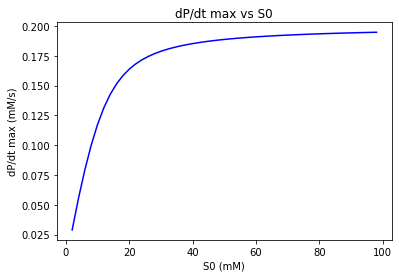

In [4]:
k1 = 0.05 #1/s
k2 = 0.1 #1/s
k3 = 0.02 #1/s
k4 = 0 #1/s

dpdtmaxdata = []
S0array = np.arange(2,100,2)

for S0 in S0array:
    dpdtmax = go(S0)
    dpdtmaxdata.append(dpdtmax)

fig = plt.figure()
plt.title("dP/dt max vs S0")
plt.plot(S0array, dpdtmaxdata, 'b-')
plt.xlabel('S0 (mM)')
plt.ylabel('dP/dt max (mM/s)')
plt.show()

The graph above models the rate of change formation (dP/dt) minus the rate of change of removal of [P]
- $K_{3}[ES]-k_{4}[E][P]$

The enzyme concentration was determined by generating values between 2 and 100.

The rate of [P] approaches a limit, as shown on the graph

## Validation 

In [ ]:
Vmax = np.amax(dpdtmaxdata)
Vmax

## Conclusion

In this project, the rate of change formation (dP/dt) minus the rate of change of removal of [P] was shown and displayed using a graph. We expected the maximum value to be 0.1946 mM which was confirmed by finding the maximum value from the graph.

Overall the results agree with what we expected.